In [86]:
import os
import torch
import numpy as np
from PIL import Image
from transformers import GLPNImageProcessor, GLPNForDepthEstimation
import cv2
from scipy.optimize import curve_fit


In [87]:
for filey in os.listdir():
    print(filey)

brotha.ipynb
output
try.py


In [88]:
distances_dict = {}

distances_dict["Real"] = [
    35,
    200,
    50,
    80,
    35,
    25,
    100,
    20,
    200
]

In [89]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib tk
%matplotlib inline

# Path to the depth map image in the output folder
depth_map_path = "output/depth_GLPN/depth_left_image.jpg"
# depth_map_path = "output/depth_image_0.png"

# Load the depth map image
depth_image = Image.open(depth_map_path)
depth_map = np.array(depth_image)


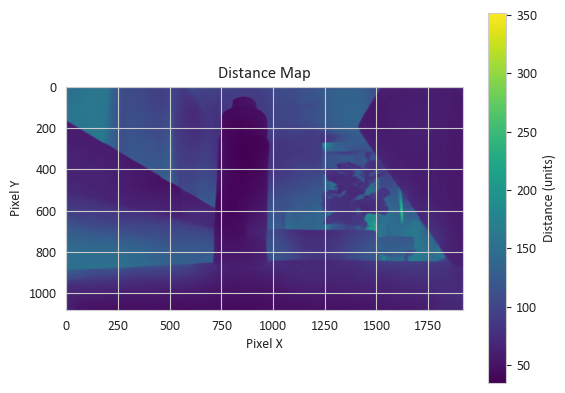

In [90]:

# Camera calibration parameters
K = [
    [953.0615149722063, 0, 670.5135610507407],
    [0, 959.3798799023834, 366.76133360900457],
    [0, 0, 1]
]
fx = K[0][0]  # Focal length in pixels along x-axis
fy = K[1][1]  # Focal length in pixels along y-axis
cx = K[0][2]  # Principal point x-coordinate
cy = K[1][2]  # Principal point y-coordinate

# Define a function to calculate distances for all pixels
def calculate_distances(depth_map, fx, fy, cx, cy):
    distances = np.zeros_like(depth_map, dtype=float)
    for y in range(depth_map.shape[0]):
        for x in range(depth_map.shape[1]):
            depth_value = depth_map[y, x]
            distances[y, x] = depth_value * np.sqrt((x - cx)**2 / fx**2 + (y - cy)**2 / fy**2 + 1)
    return distances

# Calculate distances
distances = calculate_distances(depth_map, fx, fy, cx, cy)

# Create a new matplotlib image where the scale shows the distance away from the object in units
plt.imshow(distances, cmap='viridis')
plt.colorbar(label='Distance (units)')
plt.title('Distance Map')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

[]

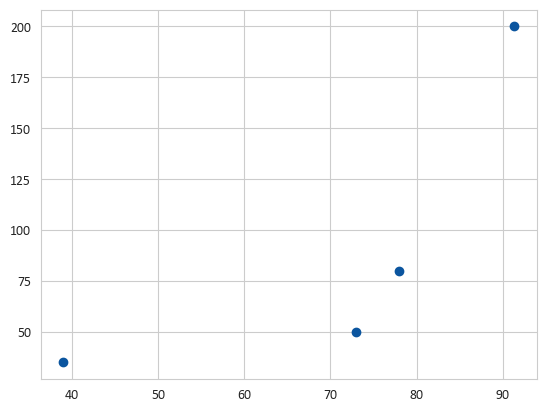

In [91]:
# plot the 4 datapoints on a scatter plot

plt.scatter([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
], # cm
[
    35,
    200,
    50,
    80
])
plt.plot()

In [92]:
# fit a quadratic curve to the 4 datapoints

a = np.array([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
])
b = np.array([
    35,
    200,
    50,
    80
])

from numpy.polynomial import Polynomial

p = Polynomial.fit(a, b, 2)

print(p)

15.864537684398577 + 82.43725202733171 x**1 + 101.59231955530304 x**2


In [93]:
# sample the points at x = 845 and y = 500

print(distances[500, 845]) # bottle
print(distances[455, 1000]) # back wall
print(distances[689, 1800]) # computer
print(distances[762, 1205]) # chair
print(distances[501, 1378]) # leaf
print(distances[348, 146]) # ledge
print(distances[126, 93]) # window
print(distances[961, 1141]) # table
print(distances[48, 1000]) # top ceiling

distances_dict["vinvino02/glpn-nyu"] = [
    p(distances[500, 845]),
    p(distances[455, 1000]),
    p(distances[689, 1800]),
    p(distances[762, 1205]),
    p(distances[501, 1378]),
    p(distances[348, 146]),
    p(distances[126, 93]),
    p(distances[961, 1141]),
    p(distances[48, 1000])
]


38.99040572641158
91.33739782459502
72.98377761812033
77.97053762494335
73.94167862020254
61.64669677948992
159.0538455626073
65.05955059400212
100.92031864728517


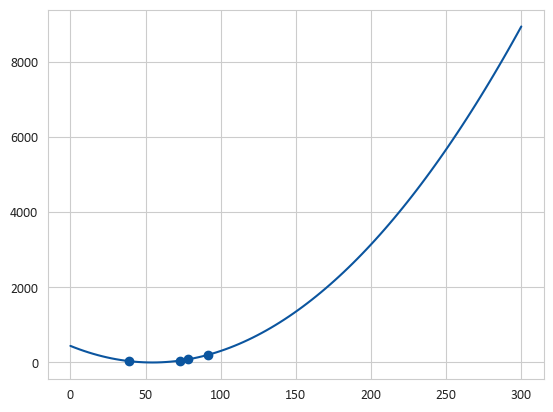

In [94]:
# plot the curve fit on the scatter plot

plt.scatter([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
], # cm
[
    35,
    200,
    50,
    80
])
plt.plot(np.linspace(0, 300, 100), p(np.linspace(0, 300, 100)))
plt.show()

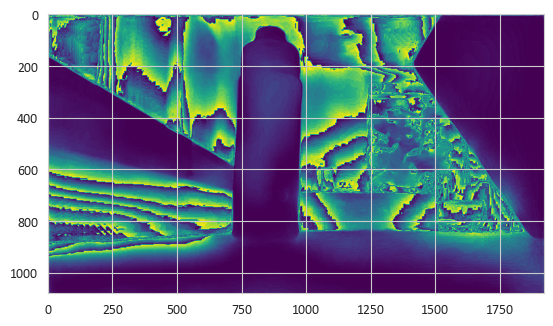

In [95]:
# Use the appropriate magic command to switch the backend
# %matplotlib tk
# use the curve fit to create a new image with the distances in cm

import numpy as np

new_image = np.zeros_like(depth_map)

for y in range(depth_map.shape[0]):
    for x in range(depth_map.shape[1]):
        depth_value = depth_map[y, x]
        distance = depth_value * np.sqrt((x - cx)**2 / fx**2 + (y - cy)**2 / fy**2 + 1)
        new_image[y, x] = p(distance)

plt.imshow(new_image, cmap='viridis')

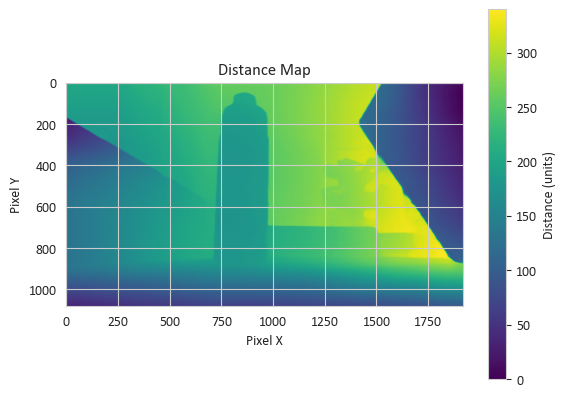

In [96]:
# Path to the depth map image in the output folder
depth_map_path = "output/depth/depth_left_image.jpg"
# depth_map_path = "output/depth_image_0.png"

# Load the depth map image
depth_image = Image.open(depth_map_path)
depth_map = np.array(depth_image)

# Camera calibration parameters
K = [
    [953.0615149722063, 0, 670.5135610507407],
    [0, 959.3798799023834, 366.76133360900457],
    [0, 0, 1]
]
fx = K[0][0]  # Focal length in pixels along x-axis
fy = K[1][1]  # Focal length in pixels along y-axis
cx = K[0][2]  # Principal point x-coordinate
cy = K[1][2]  # Principal point y-coordinate

# Define a function to calculate distances for all pixels
def calculate_distances(depth_map, fx, fy, cx, cy):
    distances = np.zeros_like(depth_map, dtype=float)
    for y in range(depth_map.shape[0]):
        for x in range(depth_map.shape[1]):
            depth_value = 255 - depth_map[y, x]
            distances[y, x] = depth_value * np.sqrt((x - cx)**2 / fx**2 + (y - cy)**2 / fy**2 + 1)
    return distances

# Calculate distances
distances = calculate_distances(depth_map, fx, fy, cx, cy)

# Create a new matplotlib image where the scale shows the distance away from the object in units
plt.imshow(distances, cmap='viridis')
plt.colorbar(label='Distance (units)')
plt.title('Distance Map')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

[]

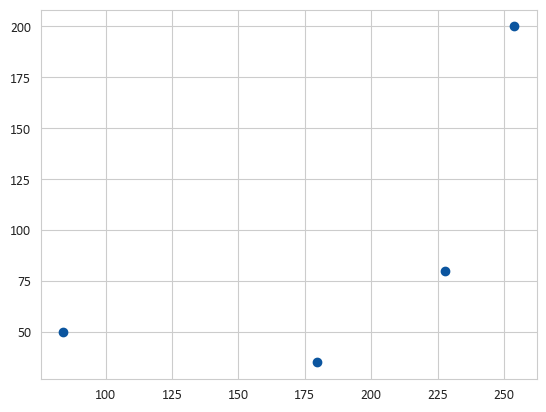

In [97]:
# plot the 4 datapoints on a scatter plot

plt.scatter([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
], # cm
[
    35,
    200,
    50,
    80
])
plt.plot()

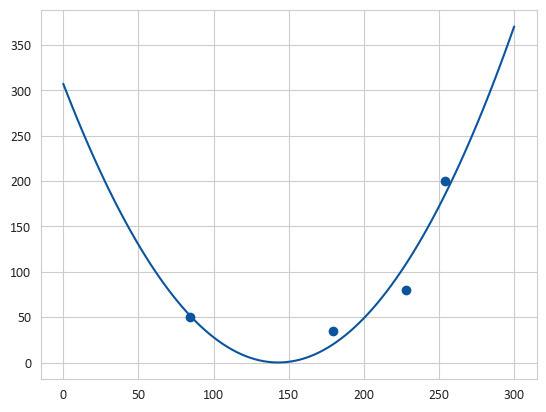

In [98]:
# fit a quadratic curve to the 4 datapoints

a = np.array([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
])
b = np.array([
    35,
    200,
    50,
    80
])

""" from scipy.optimize import curve_fit

# Define the exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

popt, pcov = curve_fit(exponential_func, a, b)

# plot the curve fit on the scatter plot

plt.scatter([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
], # cm
[
    35,
    200,
    50,
    80
])
plt.plot(np.linspace(0, 300, 100), exponential_func(np.linspace(0, 300, 100), *popt))
plt.show() """

from numpy.polynomial import Polynomial

p = Polynomial.fit(a, b, 2)

# plot the curve fit on the scatter plot

plt.scatter([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
], # cm
[
    35,
    200,
    50,
    80
])
plt.plot(np.linspace(0, 300, 100), p(np.linspace(0, 300, 100)))
plt.show()

In [99]:
# sample the points at x = 845 and y = 500

# sample the points at x = 845 and y = 500

print(distances[500, 845]) # bottle
print(distances[455, 1000]) # back wall
print(distances[689, 1800]) # computer
print(distances[762, 1205]) # chair
print(distances[501, 1378]) # leaf
print(distances[348, 146]) # ledge
print(distances[126, 93]) # window
print(distances[961, 1141]) # table
print(distances[48, 1000]) # top ceiling

distances_dict["intel/dpt-hybrid-midas"] = [
    p(distances[500, 845]),
    p(distances[455, 1000]),
    p(distances[689, 1800]),
    p(distances[762, 1205]),
    p(distances[501, 1378]),
    p(distances[348, 146]),
    p(distances[126, 93]),
    p(distances[961, 1141]),
    p(distances[48, 1000])
]

179.5610790032112
253.83300093114195
84.09000464696473
227.82016462288135
279.4744802085621
95.89486165698433
191.34297210539222
140.32452088902417
262.83643427919327


In [100]:
distances_dict

{'Real': [35, 200, 50, 80, 35, 25, 100, 20, 200],
 'vinvino02/glpn-nyu': [35.019605212369854,
  199.89410926703346,
  49.56291452063145,
  80.52337099996515,
  54.937751493617384,
  6.621149956698686,
  1618.8855467671349,
  15.537483233332793,
  318.08767968229984],
 'intel/dpt-hybrid-midas': [20.172919435565486,
  184.52869406849447,
  52.178309700830965,
  108.12007679510896,
  279.7293854956998,
  33.3943304033469,
  35.192613488773546,
  0.2039237735681816,
  215.70754882169388]}

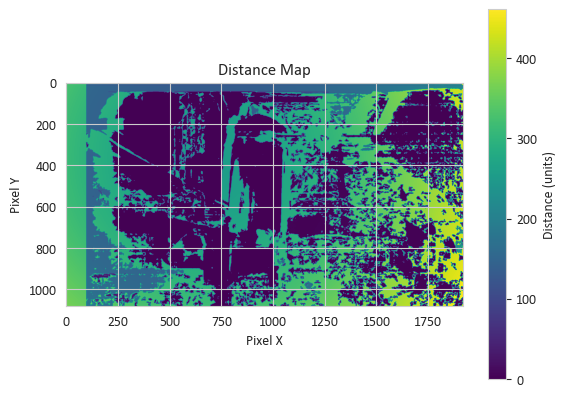

In [101]:
# repeat the same process for the stereo depth map
# Path to the depth map image in the output folder
depth_map_path = "output/stereo/depth_map_gray.png"
# depth_map_path = "output/depth_image_0.png"

# Load the depth map image
depth_image = Image.open(depth_map_path)
depth_map = np.array(depth_image)

# Define a function to calculate distances for all pixels
def calculate_distances(depth_map, fx, fy, cx, cy):
    distances = np.zeros_like(depth_map, dtype=float)
    for y in range(depth_map.shape[0]):
        for x in range(depth_map.shape[1]):
            depth_value = depth_map[y, x]
            distances[y, x] = depth_value * np.sqrt((x - cx)**2 / fx**2 + (y - cy)**2 / fy**2 + 1)
    return distances

# Calculate distances
distances = calculate_distances(depth_map, fx, fy, cx, cy)

# Create a new matplotlib image where the scale shows the distance away from the object in units
plt.imshow(distances, cmap='viridis')
plt.colorbar(label='Distance (units)')
plt.title('Distance Map')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

[]

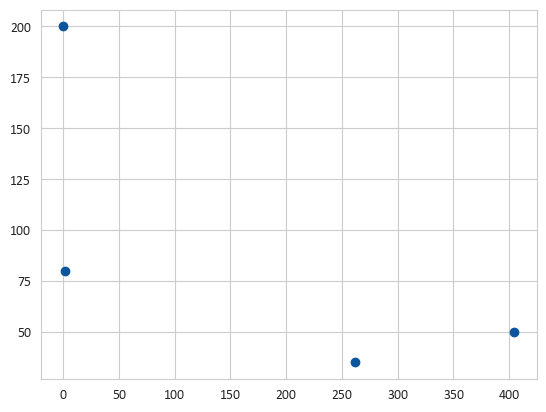

In [102]:
# plot the 4 datapoints on a scatter plot

plt.scatter([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
], # cm
[
    35,
    200,
    50,
    80
])
plt.plot()

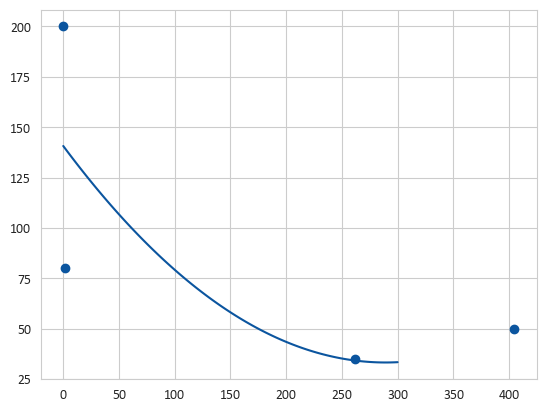

In [103]:
# fit a quadratic curve to the 4 datapoints

a = np.array([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
])
b = np.array([
    35,
    200,
    50,
    80
])

""" from scipy.optimize import curve_fit

# Define the exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

popt, pcov = curve_fit(exponential_func, a, b)

# plot the curve fit on the scatter plot

plt.scatter([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
], # cm
[
    35,
    200,
    50,
    80
])
plt.plot(np.linspace(0, 300, 100), exponential_func(np.linspace(0, 300, 100), *popt))
plt.show() """

from numpy.polynomial import Polynomial

p = Polynomial.fit(a, b, 2)

# plot the curve fit on the scatter plot

plt.scatter([
    distances[500, 845],
    distances[455, 1000],
    distances[689, 1800],
    distances[762, 1205]
], # cm
[
    35,
    200,
    50,
    80
])
plt.plot(np.linspace(0, 300, 100), p(np.linspace(0, 300, 100)))
plt.show()

In [104]:
# sample the points at x = 845 and y = 500

# sample the points at x = 845 and y = 500

print(distances[500, 845]) # bottle
print(distances[455, 1000]) # back wall
print(distances[689, 1800]) # computer
print(distances[762, 1205]) # chair
print(distances[501, 1378]) # leaf
print(distances[348, 146]) # ledge
print(distances[126, 93]) # window
print(distances[961, 1141]) # table
print(distances[48, 1000]) # top ceiling

distances_dict["Stereo Vision (OpenCV)"] = [
    p(distances[500, 845]),
    p(distances[455, 1000]),
    p(distances[689, 1800]),
    p(distances[762, 1205]),
    p(distances[501, 1378]),
    p(distances[348, 146]),
    p(distances[126, 93]),
    p(distances[961, 1141]),
    p(distances[48, 1000])
]

261.6461436903935
0.0
404.5839846221888
1.2182896503897398
319.5784414940957
143.8422924854765
304.95286179296886
1.2756774626274925
108.68342008169172


C:\Users\akash\AppData\Local\Temp\ipykernel_6080\309256225.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Group', y='Value', data=df_long, ci=None)


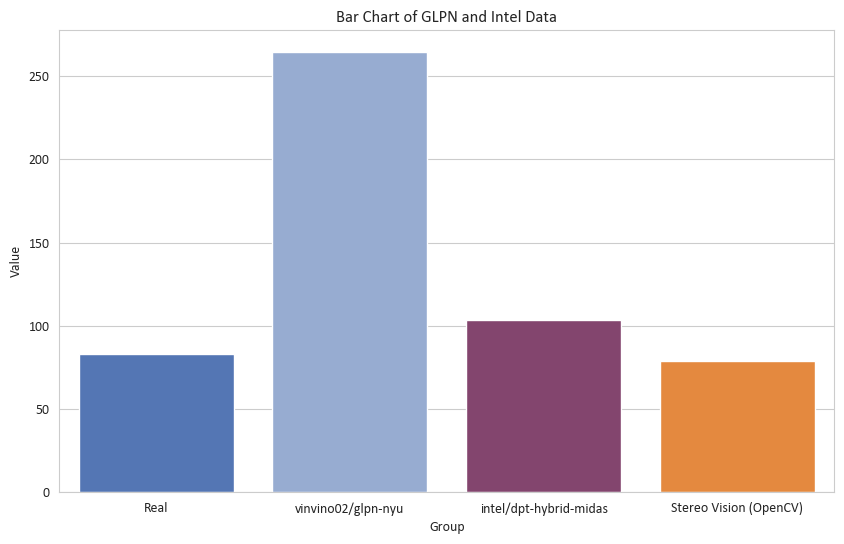

In [146]:
# create a bar chart in seaborn with the keys being the groups and the values being the bars in the group
import seaborn as sns, pandas as pd, numpy as np

# Transform the data into a DataFrame
df = pd.DataFrame(distances_dict)

# Melt the DataFrame to long format
df_long = df.melt(var_name='Group', value_name='Value')

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Value', data=df_long, ci=None)

# Add titles and labels
plt.title('Bar Chart of GLPN and Intel Data')
plt.xlabel('Group')
plt.ylabel('Value')

# Display the plot
plt.show()

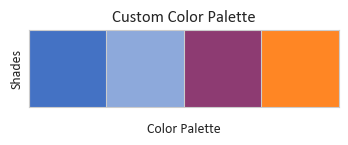

In [145]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set styles
sns.set_style("whitegrid", {'font.family': 'Calibri'})

# Generate color palettes
custom_palette = sns.blend_palette(["#4472c4", "#8da9db", "#8D3B72", "#ff8624"], n_colors=4, as_cmap=False)
sns.set_palette(custom_palette)

# Plot the custom color palette
sns.palplot(custom_palette)
plt.xlabel('Color Palette')
plt.ylabel('Shades')
plt.title('Custom Color Palette')
plt.show()


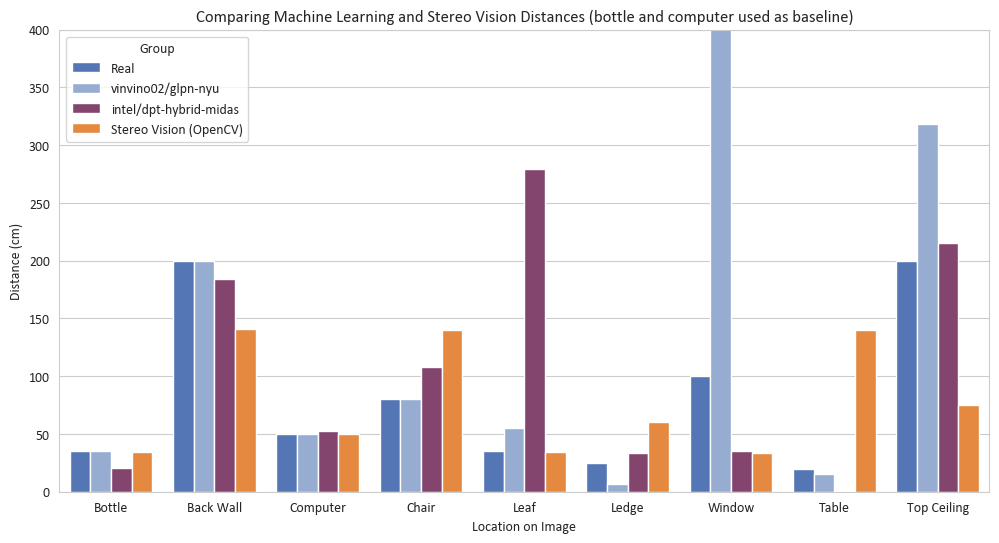

In [147]:
ID = ['Bottle', 'Back Wall', 'Computer', 'Chair', 'Leaf', 'Ledge', 'Window', 'Table', 'Top Ceiling']

# Melt the DataFrame to long format
df_long = df.melt(var_name='Group', value_name='Value', ignore_index=False)
df_long.reset_index(inplace=True)
df_long.rename(columns={'index': 'ID'}, inplace=True)

# Map the custom labels to the ID column
df_long['ID'] = df_long['ID'].map(lambda x: ID[x])

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='ID', y='Value', hue='Group', data=df_long)

# Add titles and labels
plt.title('Comparing Machine Learning and Stereo Vision Distances (bottle and computer used as baseline)')
plt.xlabel('Location on Image')
plt.ylabel('Distance (cm)')

# limit the y-axis to 100
plt.ylim(0, 400)

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# Display the plot
plt.show()

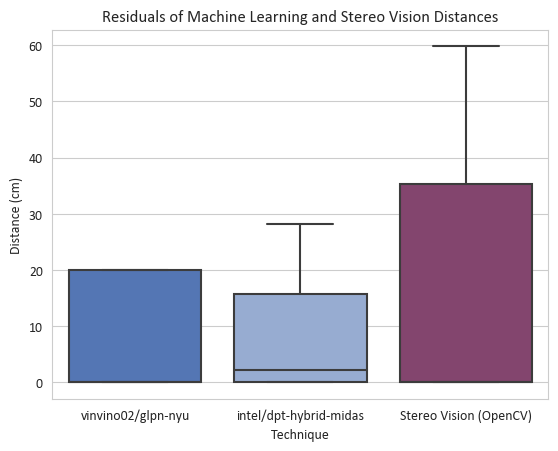

In [148]:
# create a new dataframe with the distances of the groups minus the real distances and create box plots
real = df['Real']

# create a new dataframe with the distances of the groups minus the real distances and create box plots
df_diff = pd.DataFrame({key: df[key] - real for key in df.columns})

for col in df_diff.columns:
    df_diff[col] = df_diff[col].apply(lambda x: x if x > 0 else 0)

df_diff.head()

# delete the 'Real' column
df_diff.drop('Real', axis=1, inplace=True)

# create box plots with seaborn and hide outliers
sns.boxplot(data=df_diff, showfliers=False)

plt.title('Residuals of Machine Learning and Stereo Vision Distances')
plt.xlabel('Technique')
plt.ylabel('Distance (cm)')

plt.show()

In [110]:
df_diff.describe()

,vinvino02/glpn-nyu,intel/dpt-hybrid-midas,Stereo Vision (OpenCV)
count,9.000000,9.000000,9.000000
mean,184.161550,33.236628,23.913959
std,502.010521,79.892965,41.855509
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.019605,2.178310,0.000000
75%,19.937751,15.707549,35.385858
max,1518.885547,244.729385,119.734681


In [152]:
# perform a hypothesis test on df to see if the means are significantly different from "Real"
from scipy.stats import ttest_1samp

t_stat, p_val = ttest_1samp(df_diff, 0)
# print the columns
print("Columns:", [col for col in df_diff.columns])
print("t-statistic:", t_stat)
print("p-value:", p_val)

Columns: ['vinvino02/glpn-nyu', 'intel/dpt-hybrid-midas', 'Stereo Vision (OpenCV)']
t-statistic: [1.10054397 1.24804335 1.71403665]
p-value: [0.30310461 0.24730469 0.12486959]
